# EPFL network - School growth over the years 

In [1]:
import json
import pickle
import collections
from collections import defaultdict
from BuildGraphModule import *
from UniformData import *
from MultiGraph import *
from AnalysisModule import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
data = uniform_authors(data)

In [4]:
# Uniform strings - EPFL Authors
data = uniform_epfl_authors(data)

In [5]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

In [6]:
dict_lab_site, dict_labs, dict_labs_paper = lab_dictionaries(data_cut)

In [7]:
# Get the list of paper lab and year. Dictionary (lab, dict(year, list of papers))
dict_lab_years_pub = {}#defaultdict(list)
for lab in dict_labs_paper:
    dict_lab_years_pub[lab] = defaultdict(list)
    for pub in dict_labs_paper[lab]:
        dict_lab_years_pub[lab][data_cut[pub]['Publication date']] += [pub]

In [8]:
# Dictionary (year, total number of papers)
year_papers = defaultdict(list)
for lab in list(dict_lab_years_pub.keys()):
    for year in list(dict_lab_years_pub[lab].keys()):
        year_papers[year] += dict_lab_years_pub[lab][year]
for year in list(year_papers.keys()):
    year_papers[year] = len(set(year_papers[year]))

In [9]:
# Get dictionary (lab, dict(year,num of pubblication))
dict_author_year = {}
#dict_author_num_year = {}
for lab in dict_lab_years_pub:
    dict_author_year[lab] = defaultdict(list)
    for year in list(dict_lab_years_pub[lab].keys()):
        try:
            dict_author_year[lab][year] += [list(a.keys()) for p in dict_lab_years_pub[lab][year] for a in data_cut[p]['Epfl authors']]
        except:
            dict_author_year[lab][year] += []
            continue
    for year in list(dict_lab_years_pub[lab].keys()):
        list_authors = [i[0] for i in dict_author_year[lab][year]]
        dict_author_year[lab][year] = len(set(list_authors))

In [10]:
# Dictionary (year, number of authors)
year_authors = defaultdict(int)
for lab in list(dict_author_year.keys()):
    for year in list(dict_author_year[lab].keys()):
        year_authors[year] += dict_author_year[lab][year]

In [11]:
# Get the dictionary (lab, dict(year, number of papers))
dict_lab_years = defaultdict(list)
for lab in dict_labs_paper:
    for pub in dict_labs_paper[lab]:
        dict_lab_years[lab] += [data_cut[pub]['Publication date']]
    dict_lab_years[lab] = collections.Counter(dict_lab_years[lab])
    #dict_lab_years[lab]['Total'] = sum(list(dict_lab_years[lab].values()))

In [12]:
list_schools = ['ENAC', 'SB', 'IC', 'STI', 'SV']
dict_school_pub = {}
dict_school_authors = {}

In [13]:
# Dictionary (School, dict(year, number of publication))
for school in list_schools:
    sc_labs = school_lab(dict_lab_site, school)
    dict_school_pub = school_publication(sc_labs, school, dict_lab_years, dict_school_pub)

In [14]:
# Dictionary (School, dict(year, number of authors))
for school in list_schools:
    sc_labs = school_lab(dict_lab_site, school)
    dict_school_authors = school_author(sc_labs, school, dict_author_year, dict_school_authors)

In [15]:
# Compute the ratio between number of total paper each year/number of authors @TODO: SHOULD BE NORMALIZED TO MAKE VALUES
# COMPARABLE
ratio_productivity = {}
for school in list_schools:
    ratio_productivity[school] = {}
    for year in list(dict_school_authors[school].keys()):
        try:
            ratio_productivity[school][year] = (dict_school_pub[school][year]/year_papers[year])/(dict_school_authors[school][year]/year_authors[year])
        except:
            continue            

In [16]:
ratio_productivity

{'ENAC': {'1993': 0.9074406901509704,
  '1994': 1.2202844894777862,
  '1995': 1.1372172721041809,
  '1996': 0.9318921993884662,
  '1997': 1.4297742614502431,
  '1998': 1.179125230080644,
  '1999': 1.27884915245712,
  '2000': 1.7356942839594849,
  '2001': 1.710595025422564,
  '2002': 1.926621999830379,
  '2003': 1.8654206894177983,
  '2004': 2.126692319187089,
  '2005': 2.902125455016428,
  '2006': 3.2510113519091846,
  '2007': 3.2290865384615386,
  '2008': 2.9635456372582993,
  '2009': 3.4509256522840497,
  '2010': 2.3904087282201596,
  '2011': 1.971170622528744,
  '2012': 2.397078049618836,
  '2013': 2.6743665449461185,
  '2014': 2.279559520938831,
  '2015': 3.2763583564023238,
  '2016': 5.010766129032258},
 'IC': {'1993': 0.8172897196261681,
  '1994': 1.0933749025720967,
  '1995': 0.9787525702535983,
  '1996': 1.246594222104426,
  '1997': 1.6218697829716193,
  '1998': 1.7331657542125554,
  '1999': 1.8180360645842764,
  '2000': 1.2020855682827514,
  '2001': 0.907943666429306,
  '2002'

<Container object of 24 artists>

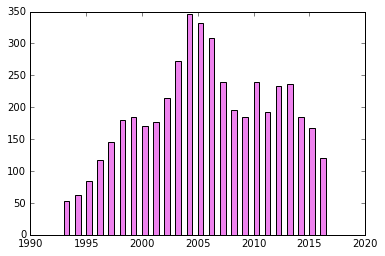

In [17]:
plt.bar(dict_school_pub['IC'].keys(), dict_school_pub['IC'].values(), 0.5, color='violet')

In [18]:
dict_school_pub['SB'].keys()

dict_keys(['2012', '2003', '2005', '2013', '2007', '2010', '2016', '2004', '2014', '1994', '2009', '2015', '1998', '2000', '2001', '1995', '2008', '2011', '2006', '2002', '1997', '1993', '1999', '1996'])

<Container object of 24 artists>

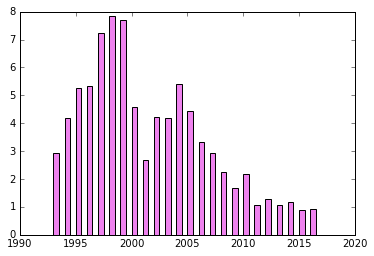

In [19]:
plt.bar(ratio_productivity['IC'].keys(), ratio_productivity['IC'].values(), 0.5, color='violet')


<Container object of 25 artists>

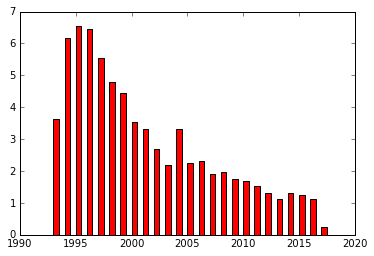

In [20]:
plt.bar(ratio_productivity['STI'].keys(), ratio_productivity['STI'].values(), 0.5, color='r')

